<a href="https://colab.research.google.com/github/yiyangwang0715/covid-tweets/blob/main/SAC_Final_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Final Report- with Team3/Data"
import os
os.chdir(path)
os.listdir(path)

['covid-extract_cleaned_tweets_10_24_LOCATION_LEMM.csv',
 'liberal_data.csv',
 'liberal_data.gsheet',
 'State_level_regulation_data.xlsx']

Cleaning data

In [ ]:

# Package Used
import pandas as pd
import numpy as np
import re


raw_path ='covid-extract_cleaned_tweets_10_24_LOCATION_LEMM.csv'

# load the dataset
df = pd.read_csv(raw_path,dtype={"ID":str})



In [ ]:
#1. Uniform State Names into Abbreviation
us_state_abbrev = {
    'alabama': 'AL',
    'alaska': 'AK',
    'american samoa': 'AS',
    'arizona': 'AZ',
    'arkansas': 'AR',
    'california': 'CA',
    'colorado': 'CO',
    'connecticut': 'CT',
    'delaware': 'DE',
    'district of columbia': 'DC',
    'florida': 'FL',
    'georgia': 'GA',
    'guam': 'GU',
    'hawaii': 'HI',
    'idaho': 'ID',
    'illinois': 'IL',
    'indiana': 'IN',
    'iowa': 'IA',
    'kansas': 'KS',
    'kentucky': 'KY',
    'louisiana': 'LA',
    'maine': 'ME',
    'maryland': 'MD',
    'massachusetts': 'MA',
    'michigan': 'MI',
    'minnesota': 'MN',
    'mississippi': 'MS',
    'missouri': 'MO',
    'montana': 'MT',
    'nebraska': 'NE',
    'nevada': 'NV',
    'new hampshire': 'NH',
    'new jersey': 'NJ',
    'new mexico': 'NM',
    'new york': 'NY',
    'north carolina': 'NC',
    'north dakota': 'ND',
    'northern mariana islands':'MP',
    'ohio': 'OH',
    'oklahoma': 'OK',
    'oregon': 'OR',
    'pennsylvania': 'PA',
    'puerto rico': 'PR',
    'rhode island': 'RI',
    'south carolina': 'SC',
    'south dakota': 'SD',
    'tennessee': 'TN',
    'texas': 'TX',
    'utah': 'UT',
    'vermont': 'VT',
    'virgin islands': 'VI',
    'virginia': 'VA',
    'washington': 'WA',
    'west virginia': 'WV',
    'wisconsin': 'WI',
    'wyoming': 'WY',
    'northern mariana islands':'MP',
    'palau': 'PW',
    'puerto rico': 'PR',
    'virgin islands': 'VI',
    'district of columbia': 'DC'}

df['Location'] = df['Location'].replace(us_state_abbrev)
df['Location'] = df['Location'].str.upper()



In [ ]:
#2.Removing "\\n" "@account,"some punctuation, URLs, hashtags and whitespace within strings.
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
df = clean_text(df, "Processed_Tweet")
df

,ID,Location,Processed_Tweet
0,7.968997458894029e+17,TX,bet tyrannical dem governor end covid stay hom...
1,1143848268.0,NC,accord ons 40000 uk die coronavirus double f...
2,9.55538060434989e+17,NC,try editorial leftist editorial board convinc...
3,37076194.0,TN,careful crazy nancy total disaster usa commu...
4,274263703.0,NY,fuck mitch putin puppet make donation su...
...,...,...,...
20620437,1.1411070752899482e+18,WV,covid19 cause trump supporter abandon
20620438,1.1524247843171697e+18,MA,aguero say coronavirus pandemic scare player
20620439,917249851.0,VT,illegal logger land grabber miner introduce ...
20620440,31361365.0,TN,cash pandemic document lawmaker 1500 stock tr...


In [ ]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
df['Processed_Tweet']= df['Processed_Tweet'].apply(lambda x : " ".join(word for word in x.split() if word not in stopwords ))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Sample** 50000

In [ ]:
sample1=df.sample(n=1000000, random_state=888)

Tokenization

In [ ]:
import pandas as pd
from configparser import ConfigParser
import spacy
from spacy import displacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1600000 
covid_tweets=[]

for doc in nlp.pipe(sample1.Processed_Tweet, batch_size=5000, disable=["ner", "parser"]):
  covid_tweets.append(token for token in doc)

In [ ]:
tokens=[]
for doc in covid_tweets:
    for token in doc:
        tokens.append(token.text)

In [ ]:
words = ['covid', 'corona', 'covid19','amp']

for word in tokens:  # iterating on a copy since removing will mess things up
    if word in words:
        tokens.remove(word)

In [ ]:

token_str=' '.join(map(str, tokens))


'agree think say day djt kill elderly immunocompromise poor vulnerable virus work fine administration criminallynegligenthomicide new qdemocrats destroy america wakeup q vienna open street pedestrian close car enable people take walk ti fbi seize sen burr cell phone investigation coronavirus relate insider trade thank share david wonderful country people tak think go pass governor kemp sleep schedule mess fuck rahul gandhi leader raise alarm way febsaid lockdown like pause button mufti naeem stop prayer mosque get infect virus ask people devastate happen ecuador make feel lucky live us deal coronavirus 90dayfiance 90dayfianceselfquarantined landlord give notice pay house rend park house lockdown j donald trump call mexicans rapist killer call virus chinese virus call black people bash china navarro claim 2020 election go pandemic stephanopoulos respond poi reminder send weekly email fridays cde response sure join today lat german region baden wrttemberg offer help neighbour france take

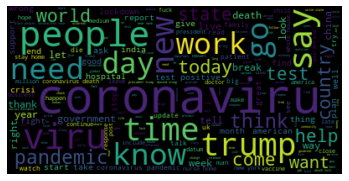

In [ ]:
wordcloud = WordCloud(background_color="black").generate(token_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#N-gram

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(tokens)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)


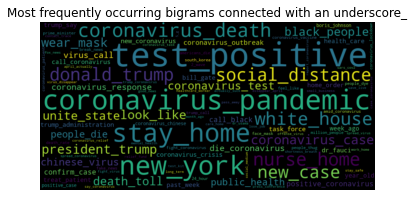

In [ ]:
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
WNL_3 = nltk.WordNetLemmatizer()

# setup and score the bigrams using the raw frequency.
finder_3 = TrigramCollocationFinder.from_words(tokens)
Trigram_measures = TrigramAssocMeasures()
scored_3 = finder_3.score_ngrams(Trigram_measures.raw_freq)
 
# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList_3 = sorted(scored_3, key=itemgetter(1), reverse=True)

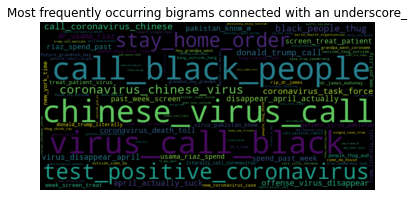

In [ ]:
word_dict_3 = {}
 
listLen_3 = len(scoredList_3)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
for i in range(listLen_3):
    word_dict_3['_'.join(scoredList_3[i][0])] = scoredList_3[i][1]
 
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict_3)
 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#state wordcloud
df_NY=df.loc[df['Location'] == 'NY']
sample_NY=df_NY.sample(n=10000, random_state=888)

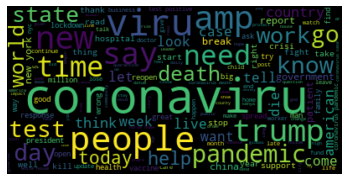

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1600000 
covid_tweets=[]

for doc in nlp.pipe(sample_NY.Processed_Tweet, batch_size=5000, disable=["ner", "parser"]):
  covid_tweets.append(token for token in doc)

tokens=[]
for doc in covid_tweets:
    for token in doc:
        tokens.append(token.text)

words = ['covid', 'corona', 'covid19','amp']

for word in tokens:  # iterating on a copy since removing will mess things up
    if word in words:
        tokens.remove(word)

token_str=' '.join(map(str, tokens))
token_str

wordcloud = WordCloud(background_color="black").generate(token_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_GA=df.loc[df['Location'] == 'GA']
sample_GA=df_GA.sample(n=10000, random_state=888)

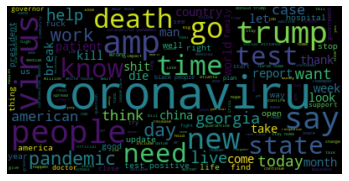

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1600000 
covid_tweets=[]

for doc in nlp.pipe(sample_GA.Processed_Tweet, batch_size=5000, disable=["ner", "parser"]):
  covid_tweets.append(token for token in doc)

tokens=[]
for doc in covid_tweets:
    for token in doc:
        tokens.append(token.text)

words = ['covid', 'corona', 'covid19']

for word in tokens:  # iterating on a copy since removing will mess things up
    if word in words:
        tokens.remove(word)
        
token_str=' '.join(map(str, tokens))
token_str

wordcloud = WordCloud(background_color="black").generate(token_str)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from textblob import TextBlob
sample1[['polarity', 'subjectivity']] = sample1['Processed_Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

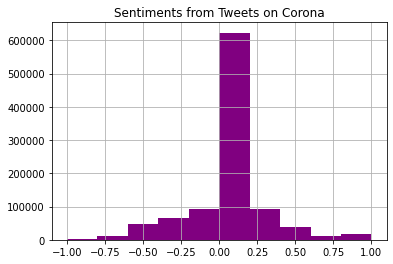

In [ ]:

sample1.hist(column='polarity',
             color="purple")

plt.title("Sentiments from Tweets on Corona")
plt.show()

In [ ]:
NoOfTerms = int(input("Enter how many tweets to search: "))
searchTerm = input("Enter Keyword/Tag to search about: ")

Enter how many tweets to search: 8506
Enter Keyword/Tag to search about: wear mask in ND


In [ ]:
        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in df_ND_F.Processed_Tweet:

            analysis = TextBlob(tweet)
            print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        

In [ ]:
    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

In [ ]:
        positive = percentage(df_ND_F,positive, NoOfTerms)
        wpositive = percentage(df_ND_F,wpositive, NoOfTerms)
        spositive = percentage(df_ND_F,spositive, NoOfTerms)
        negative = percentage(df_ND_F,negative, NoOfTerms)
        wnegative = percentage(df_ND_F,wnegative, NoOfTerms)
        snegative = percentage(df_ND_F,snegative, NoOfTerms)
        neutral = percentage(df_ND_F,neutral, NoOfTerms)

        

How people are reacting on wear mask in ND by analyzing 8506 tweets.
Weakly Positive

Detailed Report: 
9.19% people thought it was positive
24.23% people thought it was weakly positive
3.95% people thought it was strongly positive
5.48% people thought it was negative
10.52% people thought it was weakly negative
1.26% people thought it was strongly negative
45.30% people thought it was neutral


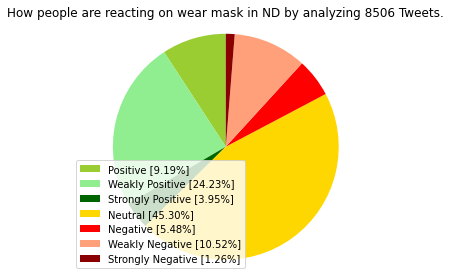

In [ ]:
        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")


        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        plotPieChart(df_ND_F,positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


In [ ]:

count1=df['Location'].value_counts()
count1=pd.DataFrame(count1)


In [ ]:
count1=count1.sort_values(by='Location',ascending=[False])
count1.head(60)

In [ ]:
sah = df_ND['Processed_Tweet'].str.contains('home')

In [ ]:
# sentiment analysis 
NoOfTerms = int(input("Enter how many tweets to search: "))
searchTerm = input("Enter Keyword/Tag to search about: ")

In [ ]:
    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

In [ ]:
        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in sample1.Processed_Tweet:

            analysis = TextBlob(tweet)
            print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


In [ ]:
        positive = percentage(sample1,positive, NoOfTerms)
        wpositive = percentage(sample1,wpositive, NoOfTerms)
        spositive = percentage(sample1,spositive, NoOfTerms)
        negative = percentage(sample1,negative, NoOfTerms)
        wnegative = percentage(sample1,wnegative, NoOfTerms)
        snegative = percentage(sample1,snegative, NoOfTerms)
        neutral = percentage(sample1,neutral, NoOfTerms)

In [ ]:
        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")


        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        plotPieChart(sample1,positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


In [ ]:
#tweet volumn in each state

count1=df['Location'].value_counts()
count1=pd.DataFrame(count1)
count1=count1.sort_values(by='Location',ascending=[False])
count.head(60)